In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import math
import sympy as sp

In [3]:
def z_test_one_sample(data, sigma, mu_0, alpha, critical_area_type, W = False):
    z_st = math.sqrt(len(data)) * (data.mean() - mu_0)/sigma # значения критерия статистики
    Z = sts.norm(0, 1) # стандартное нормальное распределение
    if critical_area_type == 'right':
        c1 = Z.isf(alpha)
        pvalue = Z.sf(z_st)
        print(f'pvalue = {pvalue}, z_st = {z_st}, c1 = {c1}')
        if pvalue > alpha:
            print(f'Гипотеза H0 не отвергается на уровне значимости {alpha * 100}%')
        else:
            print(f'Гипотеза H0 отвергается на уровне значимости {alpha * 100}%')
        if z_st < Z.ppf(0.99):
            x = np.linspace(Z.ppf(0.01), Z.ppf(0.99), 200)
            carea = np.linspace(c1, Z.ppf(0.99), 200)
            plt.subplots(figsize = (9, 9))
            plt.plot(x, sts.norm.pdf(x))
            plt.plot(c1, sts.norm.pdf(c1), 'ro', label = 'Критическая точка')
            plt.plot(z_st, sts.norm.pdf(z_st), 'go', label = 'Значение Z наблюдаемой')
            plt.grid()
            plt.fill_between(carea, sts.norm.pdf(carea), y2 = 0, alpha = 0.3, color = 'red', label = 'Критическая область')
            plt.legend()
        else:
            x = np.linspace(Z.ppf(0.01), z_st, 200)
            carea = np.linspace(c1, z_st, 200)
            plt.subplots(figsize = (9, 9))
            plt.plot(x, sts.norm.pdf(x))
            plt.plot(c1, sts.norm.pdf(c1), 'ro', label = 'Критическая точка')
            plt.plot(z_st, sts.norm.pdf(z_st), 'go', label = 'Значение Z наблюдаемой')
            plt.grid()
            plt.fill_between(carea, sts.norm.pdf(carea), y2 = 0, alpha = 0.3, color = 'red', label = 'Критическая область')
            plt.legend()
        if W:
            mu_1 = float(input('Введите mu_1 = '))
            beta = sts.norm.cdf(c1 - math.sqrt(len(data))/sigma * (mu_1 - mu_0))
            W_mu_1 = 1 - beta
            print(f'W({mu_1}) = {W_mu_1}')
            mu = np.linspace(mu_0 * 1.01, mu_1 * 1.5, 200)
            W = 1 - sts.norm.cdf(c1 - math.sqrt(len(data))/sigma * (mu - mu_0))
            plt.subplots(figsize = (9, 9))
            plt.plot(mu, W, label = 'Мощность критерия')
            plt.plot(mu_1, W_mu_1, 'ro', label = 'Мощность при mu_1')
            plt.grid()
            plt.legend()
    elif critical_area_type == 'left':
        c2 = -Z.isf(alpha)
        pvalue = Z.cdf(z_st)
        print(f'pvalue = {pvalue}, z_st = {z_st}, c2 = {c2}')
        if pvalue > alpha:
            print(f'Гипотеза H0 не отвергается на уровне значимости {alpha * 100}%')
        else:
            print(f'Гипотеза H0 отвергается на уровне значимости {alpha * 100}%')
        if z_st > Z.ppf(0.01):
            x = np.linspace(Z.ppf(0.01), Z.ppf(0.99), 200)
            carea = np.linspace(Z.ppf(0.01), c2, 200)
            plt.subplots(figsize = (9, 9))
            plt.plot(x, sts.norm.pdf(x))
            plt.plot(c2, sts.norm.pdf(c2), 'ro', label = 'Критическая точка')
            plt.plot(z_st, sts.norm.pdf(z_st), 'go', label = 'Значение Z наблюдаемой')
            plt.grid()
            plt.fill_between(carea, sts.norm.pdf(carea), y2 = 0, alpha = 0.3, color = 'red', label = 'Критическая область')
            plt.legend()
        else:
            x = np.linspace(Z.ppf(0.01), z_st, 200)
            carea = np.linspace(c2, z_st, 200)
            plt.subplots(figsize = (9, 9))
            plt.plot(x, sts.norm.pdf(x))
            plt.plot(c2, sts.norm.pdf(c2), 'ro', label = 'Критическая точка')
            plt.plot(z_st, sts.norm.pdf(z_st), 'go', label = 'Значение Z наблюдаемой')
            plt.grid()
            plt.fill_between(carea, sts.norm.pdf(carea), y2 = 0, alpha = 0.3, color = 'red', label = 'Критическая область')
            plt.legend()
        if W:
            mu_1 = float(input('Введите mu_1 = '))
            beta = sts.norm.cdf(c2 - math.sqrt(len(data))/sigma * (mu_0 - mu_1))
            W_mu_1 = 1 - beta
            print(f'W({mu_1}) = {W_mu_1}')
            mu = np.linspace(mu_1 * 0.5, mu_0 * 1.01, 200)
            W = 1 - sts.norm.cdf(c2 - math.sqrt(len(data))/sigma * (mu_0 - mu))
            plt.subplots(figsize = (9, 9))
            plt.plot(mu, W, label = 'Мощность критерия')
            plt.plot(mu_1, W_mu_1, 'ro', label = 'Мощность при mu_1')
            plt.grid()
            plt.legend()
    elif critical_area_type == 'both':
        c1 = -Z.isf(alpha/2)
        c2 = Z.isf(alpha/2)
        pvalue = 2 * min(Z.sf(z_st), Z.cdf(z_st))
        print(f'pvalue = {pvalue}, z_st = {z_st}, c1 = {c1}, c2 = {c2}')
        if pvalue > alpha:
            print(f'Гипотеза H0 не отвергается на уровне значимости {alpha * 100}%')
        else:
            print(f'Гипотеза H0 отвергается на уровне значимости {alpha * 100}%')
        x = np.linspace(Z.ppf(0.01), Z.ppf(0.99), 200)
        carea_1 = np.linspace(Z.ppf(0.01), c1, 200)
        carea_2 = np.linspace(c2, Z.ppf(0.99), 200)
        plt.subplots(figsize = (9, 9))
        plt.grid()
        plt.plot(x, Z.pdf(x))
        plt.plot(c1, sts.norm.pdf(c1), 'ro', label = 'нижняя критическая точка')
        plt.plot(c2, sts.norm.pdf(c2), 'ro', label = 'верхняя критическая точка')
        plt.plot(z_st, sts.norm.pdf(z_st), 'go', label = 'Значение Z наблюдаемой')
        plt.fill_between(carea_1, sts.norm.pdf(carea_1), y2 = 0, alpha = 0.3, color = 'red', label = 'Критическая область')
        plt.fill_between(carea_2, sts.norm.pdf(carea_2), y2 = 0, alpha = 0.3, color = 'red', label = 'Критическая область')
        plt.legend()
        if W:
            mu_1 = float(input('Введите mu_1 = '))
            beta = sts.norm.cdf(c2 - math.sqrt(len(data))/sigma * (mu_0 - mu_1)) + sts.norm.cdf(c2 + math.sqrt(len(data))/sigma * (mu_0 - mu_1)) - 1
            W_mu_1 = 1 - beta
            print(f'W({mu_1}) = {W_mu_1}')
            mu = np.linspace(mu_1 * 0.5, mu_1 * 1.5, 200)
            W = 1 - (sts.norm.cdf(c2 - math.sqrt(len(data))/sigma * (mu_0 - mu)) + sts.norm.cdf(c2 + math.sqrt(len(data))/sigma * (mu_0 - mu)) - 1)
            plt.subplots(figsize = (9, 9))
            plt.plot(mu, W, label = 'Мощность критерия')
            plt.plot(mu_1, W_mu_1, 'ro', label = 'Мощность при mu_1')
            plt.grid()
            plt.legend()

In [4]:
data = sts.norm(1, 2).rvs(1000)

pvalue = 0.41412747714084375, z_st = 0.8166517414708371, c1 = -1.9599639845400545, c2 = 1.9599639845400545
Гипотеза H0 не отвергается на уровне значимости 5.0%
Введите mu_1 = 1.1
W(1.1) = 0.3526080824447029


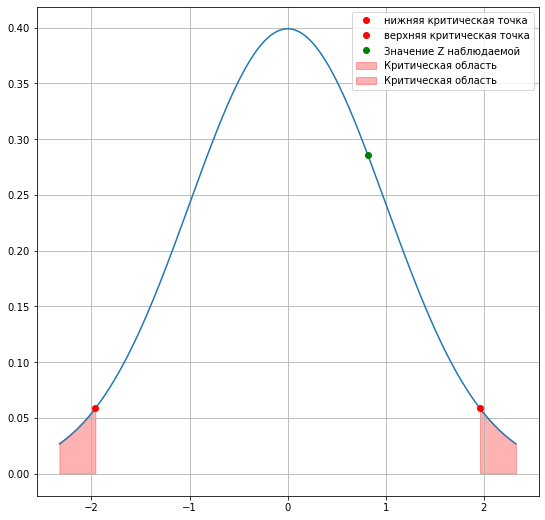

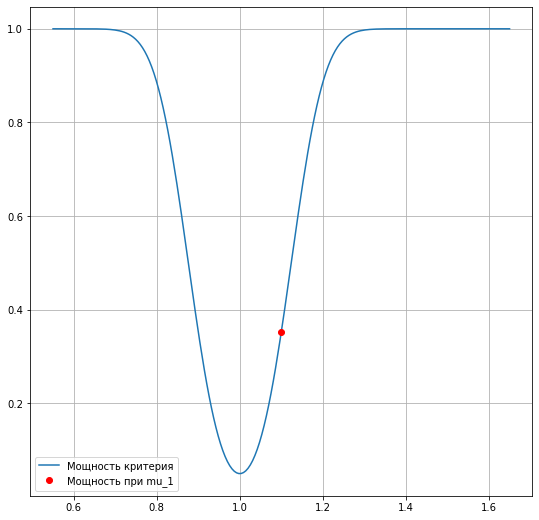

In [6]:
z_test_one_sample(data, 2, 1, 0.05, 'both', W = True)

In [45]:
def t_test_one_sample(data, mu_0, alpha, critical_area_type, W = False):
    X_mean = data.mean() # выборочное среднее
    S = data.std(ddof=1) # исправленное выборочное стандартное отклонение
    t_st = math.sqrt(len(data)) * (X_mean - mu_0) / S # наблюдаемое значение Т-статистики критерия
    T = sts.t(len(data) - 1) # распределение Стьюдента с (len(data) - 1) степенями свободы
    if critical_area_type == 'right':
        c1 = T.isf(alpha) # критическое значение
        pvalue = T.sf(t_st)
        print(f'pvalue = {pvalue}, t_st = {t_st}, c1 = {c1}')
        if pvalue > alpha:
            print(f'Гипотеза H0 не отвергается на уровне значимости {alpha * 100}%')
        else:
            print(f'Гипотеза H0 отвергается на уровне значимости {alpha * 100}%')
        if t_st < T.ppf(0.99):
            x = np.linspace(T.ppf(0.01), T.ppf(0.99), 200)
            carea = np.linspace(c1, T.ppf(0.99), 200)
            plt.subplots(figsize = (9, 9))
            plt.plot(x, T.pdf(x))
            plt.plot(c1, T.pdf(c1), 'ro', label = 'Критическая точка')
            plt.plot(t_st, T.pdf(t_st), 'go', label = 'Значение T наблюдаемой')
            plt.grid()
            plt.fill_between(carea, T.pdf(carea), y2 = 0, alpha = 0.3, color = 'red', label = 'Критическая область')
            plt.legend()
        else:
            x = np.linspace(T.ppf(0.01), t_st, 200)
            carea = np.linspace(c1, t_st, 200)
            plt.subplots(figsize = (9, 9))
            plt.plot(x, T.pdf(x))
            plt.plot(c1, T.pdf(c1), 'ro', label = 'Критическая точка')
            plt.plot(t_st, T.pdf(t_st), 'go', label = 'Значение Z наблюдаемой')
            plt.grid()
            plt.fill_between(carea, T.pdf(carea), y2 = 0, alpha = 0.3, color = 'red', label = 'Критическая область')
            plt.legend()
        if W:
            mu_1 = float(input('Введите mu_1 = '))
            delta = (mu_1 - mu_0) * math.sqrt(len(data)) / S
            beta = sts.nct(len(data) - 1, delta).cdf(c1)
            W_mu_1 = 1 - beta
            print(f'W({mu_1}) = {W_mu_1}')
            mu = np.linspace(mu_0 * 1.01, mu_1 * 1.5, 200)
            delta = (mu - mu_0) * math.sqrt(len(data)) / S
            W = 1 - sts.nct(len(data) - 1, delta).cdf(c1)
            plt.subplots(figsize = (9, 9))
            plt.plot(mu, W, label = 'Мощность критерия')
            plt.plot(mu_1, W_mu_1, 'ro', label = 'Мощность при mu_1')
            plt.grid()
            plt.legend()
    elif critical_area_type == 'left':
        c2 = -T.isf(alpha) # критическое значение
        pvalue = T.cdf(t_st)
        print(f'pvalue = {pvalue}, t_st = {t_st}, c2 = {c2}')
        if pvalue > alpha:
            print(f'Гипотеза H0 не отвергается на уровне значимости {alpha * 100}%')
        else:
            print(f'Гипотеза H0 отвергается на уровне значимости {alpha * 100}%')
        if t_st > T.ppf(0.99):
            x = np.linspace(T.ppf(0.01), T.ppf(0.99), 200)
            carea = np.linspace(T.ppf(0.01), c2, 200)
            plt.subplots(figsize = (9, 9))
            plt.plot(x, T.pdf(x))
            plt.plot(c2, T.pdf(c2), 'ro', label = 'Критическая точка')
            plt.plot(t_st, T.pdf(t_st), 'go', label = 'Значение T наблюдаемой')
            plt.grid()
            plt.fill_between(carea, T.pdf(carea), y2 = 0, alpha = 0.3, color = 'red', label = 'Критическая область')
            plt.legend()
        else:
            x = np.linspace(T.ppf(0.01), t_st, 200)
            carea = np.linspace(c2, t_st, 200)
            plt.subplots(figsize = (9, 9))
            plt.plot(x, T.pdf(x))
            plt.plot(c2, T.pdf(c2), 'ro', label = 'Критическая точка')
            plt.plot(t_st, T.pdf(t_st), 'go', label = 'Значение Z наблюдаемой')
            plt.grid()
            plt.fill_between(carea, T.pdf(carea), y2 = 0, alpha = 0.3, color = 'red', label = 'Критическая область')
            plt.legend()
        if W:
            mu_1 = float(input('Введите mu_1 = '))
            delta = (mu_1 - mu_0) * math.sqrt(len(data)) / S
            beta = 1 - sts.nct(len(data) - 1, delta).cdf(c2)
            W_mu_1 = 1 - beta
            print(f'W({mu_1}) = {W_mu_1}')
            mu = np.linspace(mu_1 * 0.5, mu_0 * 1.5, 200)
            delta = (mu - mu_0) * math.sqrt(len(data)) / S
            W = sts.nct(len(data) - 1, delta).cdf(c2)
            plt.subplots(figsize = (9, 9))
            plt.plot(mu, W, label = 'Мощность критерия')
            plt.plot(mu_1, W_mu_1, 'ro', label = 'Мощность при mu_1')
            plt.grid()
            plt.legend()
    else:
        c1 = -T.isf(alpha/2)
        c2 = T.isf(alpha/2) # критическое значение
        pvalue = 2 * min(T.sf(t_st), T.cdf(t_st))
        print(f'pvalue = {pvalue}, t_st = {t_st}, c1 = {c1},  c2 = {c2}')
        if pvalue > alpha:
            print(f'Гипотеза H0 не отвергается на уровне значимости {alpha * 100}%')
        else:
            print(f'Гипотеза H0 отвергается на уровне значимости {alpha * 100}%')
        x = np.linspace(T.ppf(0.01), T.ppf(0.99), 200)
        carea_1 = np.linspace(T.ppf(0.01), c1, 200)
        carea_2 = np.linspace(c2, T.ppf(0.99), 200)
        plt.subplots(figsize = (9, 9))
        plt.grid()
        plt.plot(x, T.pdf(x))
        plt.plot(c1, T.pdf(c1), 'ro', label = 'нижняя критическая точка')
        plt.plot(c2, T.pdf(c2), 'ro', label = 'верхняя критическая точка')
        plt.plot(t_st, T.pdf(t_st), 'go', label = 'Значение Z наблюдаемой')
        plt.fill_between(carea_1, T.pdf(carea_1), y2 = 0, alpha = 0.3, color = 'red', label = 'Критическая область')
        plt.fill_between(carea_2, T.pdf(carea_2), y2 = 0, alpha = 0.3, color = 'red', label = 'Критическая область')
        plt.legend()
        if W:
            mu_1 = float(input('Введите mu_1 = '))
            delta = (mu_1 - mu_0) * math.sqrt(len(data)) / S
            beta = sts.nct(len(data) - 1, delta).cdf(c2) - sts.nct(len(data) - 1, delta).cdf(c1)
            W_mu_1 = 1 - beta
            print(f'W({mu_1}) = {W_mu_1}')
            mu = np.linspace(mu_1 * 0.5, mu_1 * 1.5, 200)
            delta = (mu - mu_0) * math.sqrt(len(data)) / S
            W = 1 - sts.nct(len(data) - 1, delta).cdf(c2) - sts.nct(len(data) - 1, delta).cdf(c1)
            plt.subplots(figsize = (9, 9))
            plt.plot(mu, W, label = 'Мощность критерия')
            plt.plot(mu_1, W_mu_1, 'ro', label = 'Мощность при mu_1')
            plt.grid()
            plt.legend()

pvalue = 0.4177150752430657, t_st = 0.8107278394018935, c1 = -1.962341461133449,  c2 = 1.962341461133449
Гипотеза H0 не отвергается на уровне значимости 5.0%
Введите mu_1 = 2
W(2.0) = 1.0


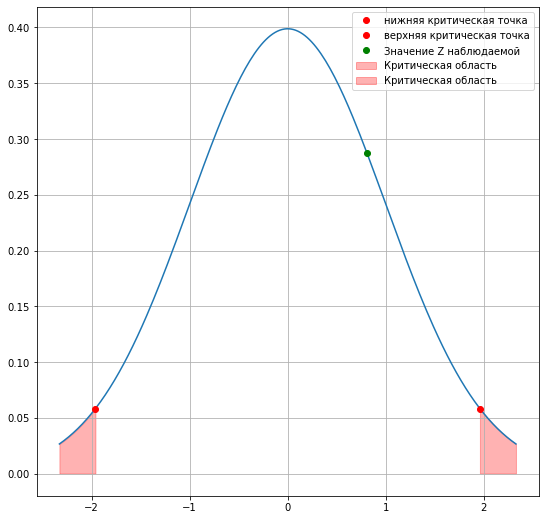

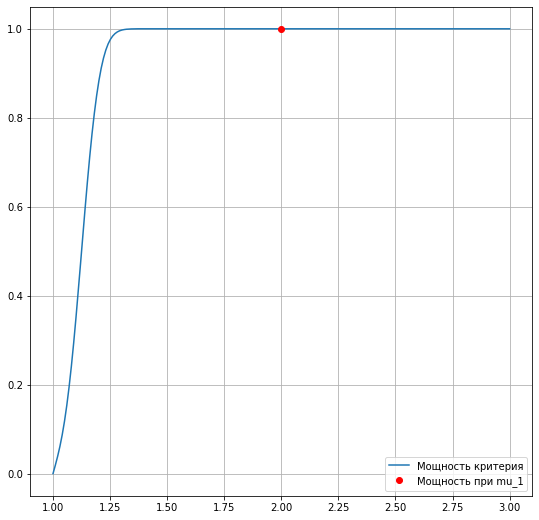

In [46]:
t_test_one_sample(data, 1, 0.05, 'both', 1)